 Imports and Loading the Dataset 

In [1]:
import json
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

with open('/Users/bishalthapa/Desktop/2024/Deep Learning/Project/Code/DeepLearningProject/clinc150_uci/data_full.json', 'r') as file:
    data = json.load(file)
    print(data)

{'oos_val': [['set a warning for when my bank account starts running low', 'oos'], ['a show on broadway', 'oos'], ['who has the best record in the nfl', 'oos'], ['how do i find the area of a circle', 'oos'], ['how many onions do i have on hand', 'oos'], ['what is the name of the 13th president', 'oos'], ['show me recent activity in my backyard', 'oos'], ['how long will it take me to pay off my card if i pay an extra $50 a month over the minimum', 'oos'], ['does our bank have free notary', 'oos'], ['what were the top stories this week', 'oos'], ['can i mix antifreeze with water', 'oos'], ['are any earning reports due', 'oos'], ['show me the channel guide', 'oos'], ['is the pnc bank open', 'oos'], ['where does the power steering fluid go', 'oos'], ['when was the last time the president visited floridau', 'oos'], ['how can i keep my windshield from fogging up in winter', 'oos'], ['how do i compute the median of a set of numbers', 'oos'], ['what is happening with brexit right nowu', 'oos']

In [2]:
# Convert lists to DataFrames
train_df = pd.DataFrame(data['train'], columns=['text', 'intent'])
val_df = pd.DataFrame(data['val'], columns=['text', 'intent'])
test_df = pd.DataFrame(data['test'], columns=['text', 'intent'])
oos_train_df=pd.DataFrame(data['oos_train'],columns=['text','intent'])
oos_test_df=pd.DataFrame(data['oos_test'],columns=['text','intent'])
oos_val_df=pd.DataFrame(data['oos_val'],columns=['text','intent'])

In [3]:
# Print out the number of samples in each subset
for subset in data:
    print(f"{subset}: {len(data[subset])} samples")

oos_val: 100 samples
val: 3000 samples
train: 15000 samples
oos_test: 1000 samples
test: 4500 samples
oos_train: 100 samples


Counter({'oos': 1200, 'translate': 150, 'transfer': 150, 'timer': 150, 'definition': 150, 'meaning_of_life': 150, 'insurance_change': 150, 'find_phone': 150, 'travel_alert': 150, 'pto_request': 150, 'improve_credit_score': 150, 'fun_fact': 150, 'change_language': 150, 'payday': 150, 'replacement_card_duration': 150, 'time': 150, 'application_status': 150, 'flight_status': 150, 'flip_coin': 150, 'change_user_name': 150, 'where_are_you_from': 150, 'shopping_list_update': 150, 'what_can_i_ask_you': 150, 'maybe': 150, 'oil_change_how': 150, 'restaurant_reservation': 150, 'balance': 150, 'confirm_reservation': 150, 'freeze_account': 150, 'rollover_401k': 150, 'who_made_you': 150, 'distance': 150, 'user_name': 150, 'timezone': 150, 'next_song': 150, 'transactions': 150, 'restaurant_suggestion': 150, 'rewards_balance': 150, 'pay_bill': 150, 'spending_history': 150, 'pto_request_status': 150, 'credit_score': 150, 'new_card': 150, 'lost_luggage': 150, 'repeat': 150, 'mpg': 150, 'oil_change_when

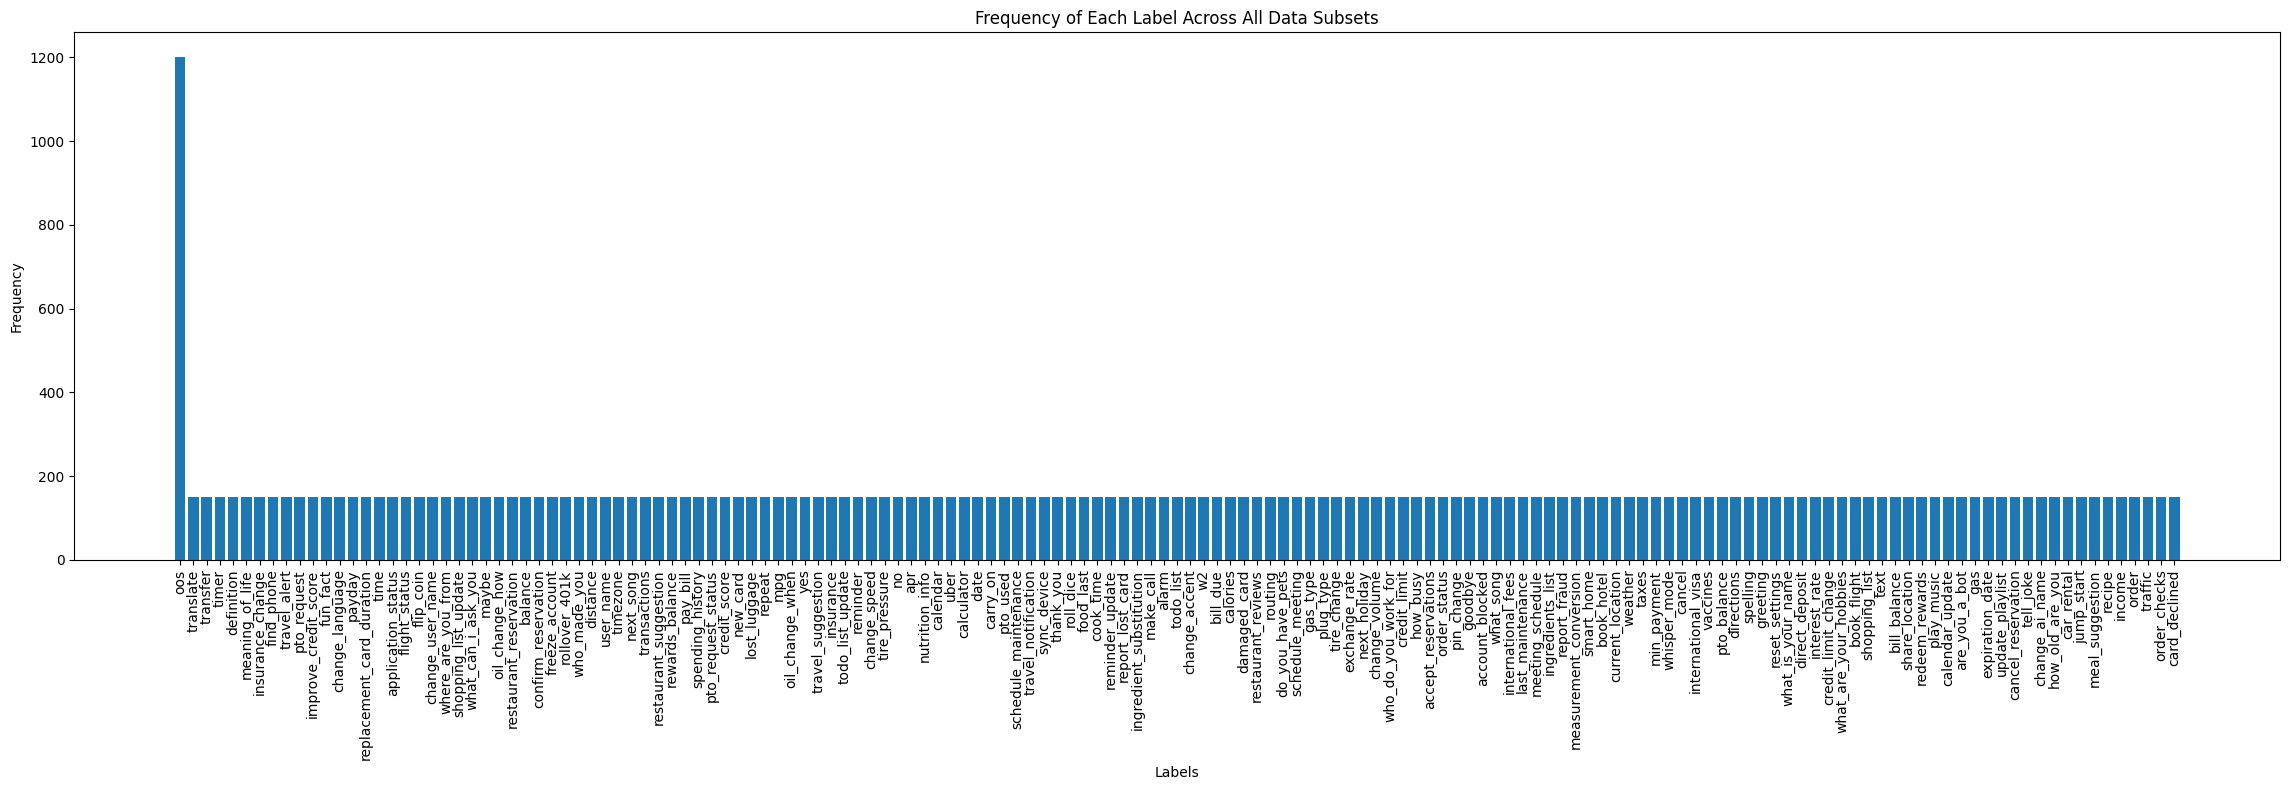

In [4]:
# Combine labels from all subsets
all_labels = []
for subset in ['oos_val', 'val', 'train', 'oos_test', 'test', 'oos_train']:
    all_labels.extend([entry[1] for entry in data[subset]])

# Count the frequency of each label
label_counts = Counter(all_labels)

# Display the frequency of each label
print(label_counts)

# Bar chart visualization of label frequencies
plt.figure(figsize=(23, 8))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Frequency of Each Label Across All Data Subsets')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

Text Preprocessing

In [5]:
stemmer = PorterStemmer()

# Preprocess the texts: lowercasing, removing special characters, and stemming
def preprocess(text):
    # Join the tokens back into a string if it's a list
    if isinstance(text, list):
        text = ' '.join(text)
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove all non-word characters
    words = text.split()
    words = [stemmer.stem(word) for word in words]  # Stemming
    return ' '.join(words)

# Example usage with your data structure
preprocessed_data = {
    key: [preprocess(item[0]) for item in value] 
    for key, value in data.items()
}

Word and Phrase Frequency Analysis

In [6]:

# Use CountVectorizer to find frequency of words in the training data
vectorizer = CountVectorizer(max_features=1000)  # considering top 1000 words
X_train = vectorizer.fit_transform(preprocessed_data['train'])

# Sum up the counts of each vocabulary word
word_counts = X_train.sum(axis=0)

# Map from vocabulary word index to actual word
words_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Display the top 10 words
print(words_freq[:10])

[('my', 5528), ('to', 5444), ('the', 3992), ('what', 3106), ('you', 3022), ('for', 2521), ('me', 2444), ('is', 2239), ('how', 2095), ('do', 1971)]


In [9]:
# pip install wordcloud

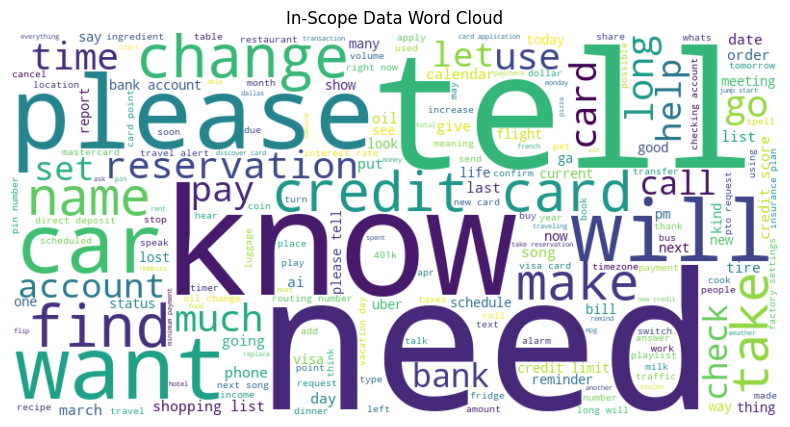

In [7]:
# Word Cloud Visualization
# THIS IS FOR IN-SCOPE 
from wordcloud import WordCloud

def plot_wordcloud(texts, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(" ".join(texts))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage for in-scope data
in_scope_texts = [entry[0] for entry in data['train'] if entry[1] != 'oos']
plot_wordcloud(in_scope_texts, "In-Scope Data Word Cloud")

In [8]:
# Concatenate all in-scope training texts
in_scope_text = " ".join(text for text in train_df['text'])

# Concatenate all out-of-scope training texts
out_of_scope_text = " ".join(text for text in oos_train_df['text'])

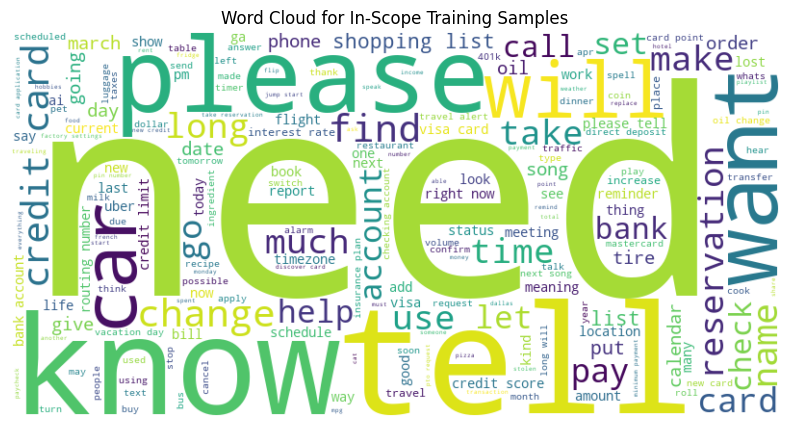

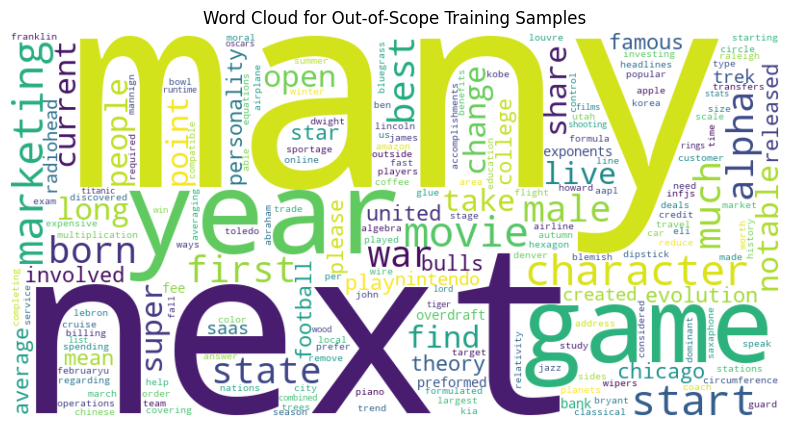

In [9]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate word cloud for in-scope training samples
generate_wordcloud(in_scope_text, "Word Cloud for In-Scope Training Samples")

# Generate word cloud for out-of-scope training samples
generate_wordcloud(out_of_scope_text, "Word Cloud for Out-of-Scope Training Samples")


def generate_and_save_wordcloud(text, title, file_path):
    # Generate the word cloud
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)
    
    # Set up plot
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    # Save the plot as a file
    plt.savefig(file_path, format='png', bbox_inches='tight', pad_inches=0.1)
    plt.close()  

in_scope_path = 'in_scope_wordcloud.png'
out_of_scope_path = 'out_of_scope_wordcloud.png'

generate_and_save_wordcloud(in_scope_text, "Word Cloud for In-Scope Training Samples", in_scope_path)
generate_and_save_wordcloud(out_of_scope_text, "Word Cloud for Out-of-Scope Training Samples", out_of_scope_path)


Proportion of Out-Of-Scope in training data: 0.67%


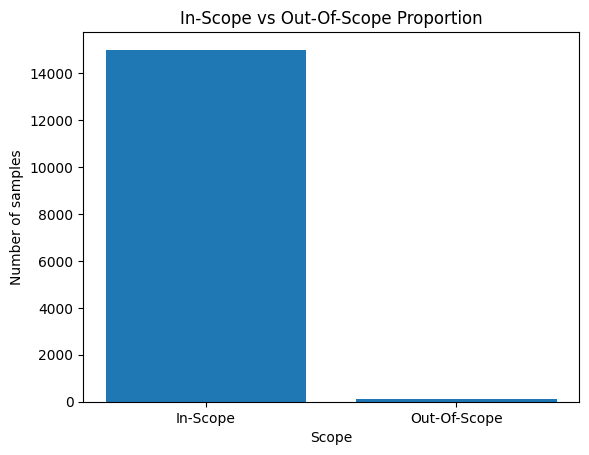

In [10]:
# Calculate the proportion of out-of-scope queries
oos_proportion = len(oos_train_df) / len(train_df)
print(f"Proportion of Out-Of-Scope in training data: {oos_proportion:.2%}")

# Visualize the proportion
plt.bar(['In-Scope', 'Out-Of-Scope'], [len(train_df), len(oos_train_df)])
plt.xlabel('Scope')
plt.ylabel('Number of samples')
plt.title('In-Scope vs Out-Of-Scope Proportion')
plt.show()

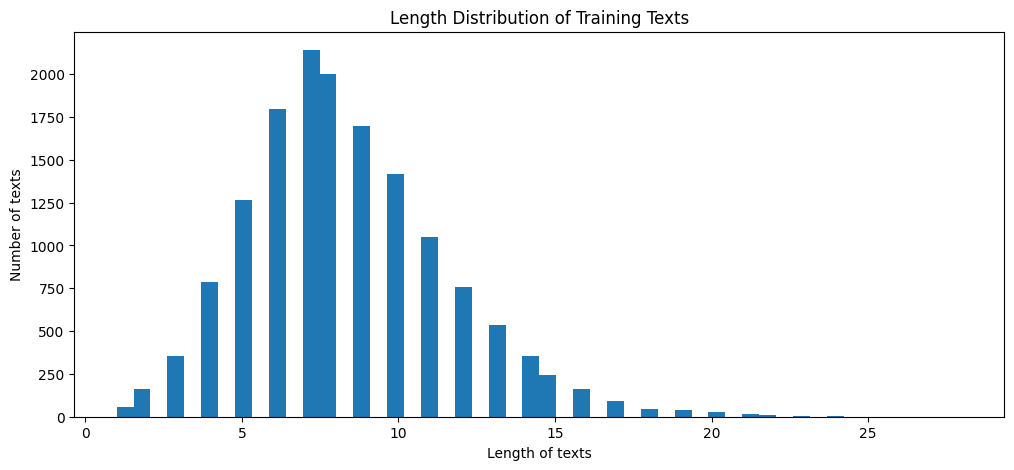

In [11]:
# Length Distribution
plt.figure(figsize=(12, 5))
lengths = [len(sample[0].split()) for sample in data['train']]  # Assuming each sample is [text, intent]
plt.hist(lengths, bins=50)
plt.title('Length Distribution of Training Texts')
plt.xlabel('Length of texts')
plt.ylabel('Number of texts')
plt.show()

In [12]:
# N-gram Analysis

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

# Example usage for bigrams in training data
top_bigrams = get_top_ngram(preprocessed_data['train'], 2)
print("Top Bigrams:", top_bigrams)

Top Bigrams: [('can you', 996), ('tell me', 898), ('on my', 878), ('what is', 732), ('need to', 732), ('is the', 591), ('do you', 469), ('my credit', 433), ('what the', 419), ('to know', 384)]


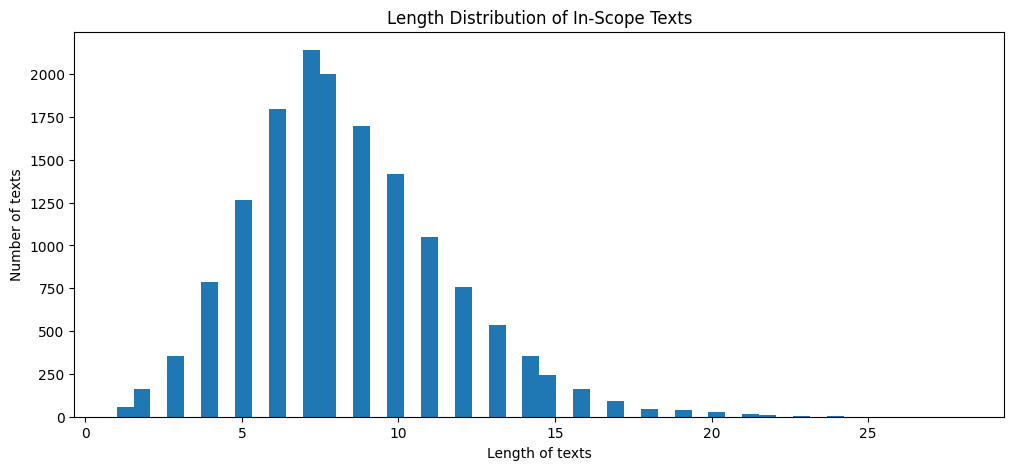

Lexical diversity in training data: 0.04687100281401893


In [13]:
# Length Distribution
plt.figure(figsize=(12, 5))
plt.hist([len(s.split()) for s in in_scope_texts], bins=50)
plt.title('Length Distribution of In-Scope Texts')
plt.xlabel('Length of texts')
plt.ylabel('Number of texts')
plt.show()

# Lexical Diversity
def lexical_diversity(texts):
    tokenized_texts = [t.split() for t in texts]
    word_count = sum([len(t) for t in tokenized_texts])
    vocab_size = len(set([word for t in tokenized_texts for word in t]))
    return vocab_size / word_count

print(f"Lexical diversity in training data: {lexical_diversity(in_scope_texts)}")

In [14]:
# Assuming 'preprocessed_data' is a dictionary containing THE preprocessed training data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(preprocessed_data['train'])

# Find the top words according to TF-IDF scores
max_val = X_train_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_val.argsort()
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
top_tfidf_words = feature_names[sorted_by_tfidf[-10:]]

top_tfidf_words

array(['hello', 'here', 'hey', 'ai', 'stop', 'possibl', 'am', 'spell',
       'bye', 'ok'], dtype=object)

In [15]:
# (train_df, val_df, test_df, oos_train_df, oos_test_df, oos_val_df)

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 10 words in the training dataset
top_words = get_top_n_words(oos_train_df['text'], 10)
print(f"Top words: {top_words}")

# Top 10 bigrams in the training dataset
top_bigrams = get_top_n_bigrams(oos_train_df['text'], 10)
print(f"Top bigrams: {top_bigrams}")


Top words: [('the', 43), ('what', 36), ('is', 27), ('how', 21), ('of', 19), ('in', 16), ('are', 12), ('do', 10), ('was', 10), ('when', 10)]
Top bigrams: [('is the', 13), ('what is', 8), ('how many', 7), ('in the', 5), ('what are', 5), ('what the', 5), ('the most', 4), ('are some', 4), ('how do', 4), ('when was', 4)]


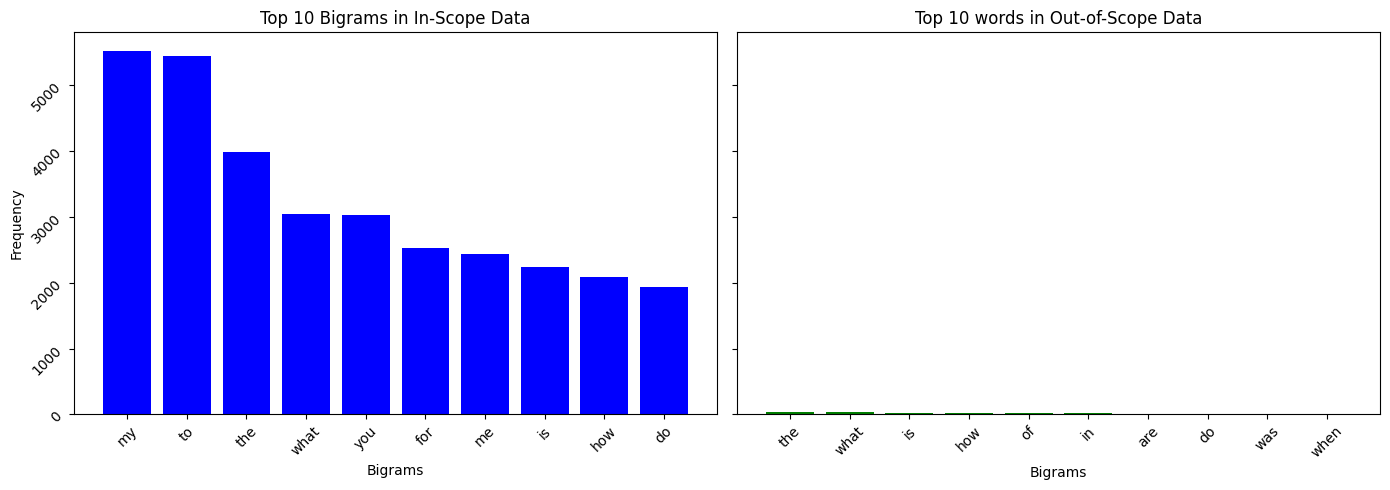

In [16]:
# Get top 10 bigrams from out-of-scope training data
oos_top_bigrams = get_top_n_words(oos_train_df['text'], 10)

# Get top 10 bigrams from in-scope training data
in_scope_top_bigrams = get_top_n_words(train_df['text'], 10)

import matplotlib.pyplot as plt

def plot_comparison_bigrams(in_scope_bigrams, oos_bigrams):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
    axes[0].bar([x[0] for x in in_scope_bigrams], [x[1] for x in in_scope_bigrams], color='blue')
    axes[0].set_title('Top 10 Bigrams in In-Scope Data')
    axes[0].tick_params(labelrotation=45)
    axes[0].set_xlabel('Bigrams')
    axes[0].set_ylabel('Frequency')

    axes[1].bar([x[0] for x in oos_bigrams], [x[1] for x in oos_bigrams], color='green')
    axes[1].set_title('Top 10 words in Out-of-Scope Data')
    axes[1].tick_params(labelrotation=45)
    axes[1].set_xlabel('Bigrams')

    plt.tight_layout()
    plt.show()

# Visualize the comparison
plot_comparison_bigrams(in_scope_top_bigrams, oos_top_bigrams)


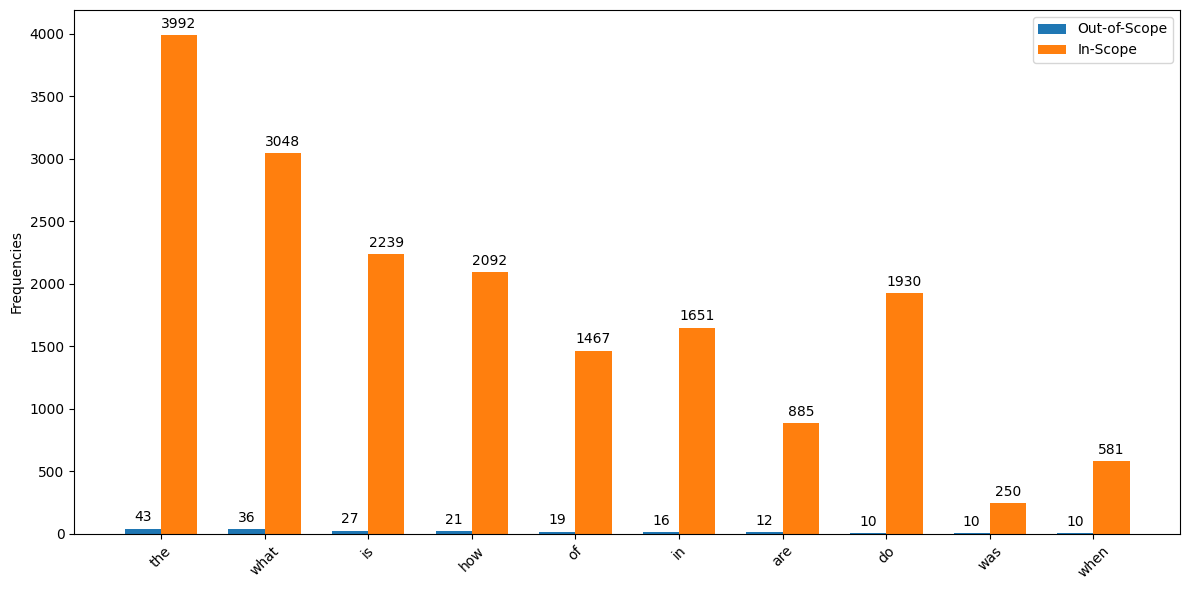

In [17]:

# Get the top 10 words from out-of-scope training data
oos_top_words = get_top_n_words(oos_train_df['text'], 10)
oos_words = [word[0] for word in oos_top_words]  # Extract just the words

# Initialize CountVectorizer with the vocabulary set to the top out-of-scope words
vec_in_scope = CountVectorizer(vocabulary=oos_words)
bag_of_words_in_scope = vec_in_scope.fit_transform(train_df['text'])
sum_words_in_scope = bag_of_words_in_scope.sum(axis=0) 
in_scope_freq = [(word, sum_words_in_scope[0, idx]) for word, idx in vec_in_scope.vocabulary_.items()]

def plot_word_frequency_comparison(oos_freq, in_scope_freq):
    # Data preparation
    labels = [x[0] for x in oos_freq]
    oos_counts = [x[1] for x in oos_freq]
    in_scope_counts = [x[1] for x in in_scope_freq]

    x = list(range(len(labels)))  # Convert range to list
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar([xi - width/2 for xi in x], oos_counts, width, label='Out-of-Scope')
    rects2 = ax.bar([xi + width/2 for xi in x], in_scope_counts, width, label='In-Scope')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Frequencies')
    # ax.set_title('Word frequencies in Out-of-Scope vs. In-Scope')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    plt.savefig("Word frequencies.png", format='png', bbox_inches='tight', pad_inches=0.1)

    plt.show()

# Example call to the function (assuming oos_top_words and in_scope_freq are previously computed)
plot_word_frequency_comparison(oos_top_words, in_scope_freq)

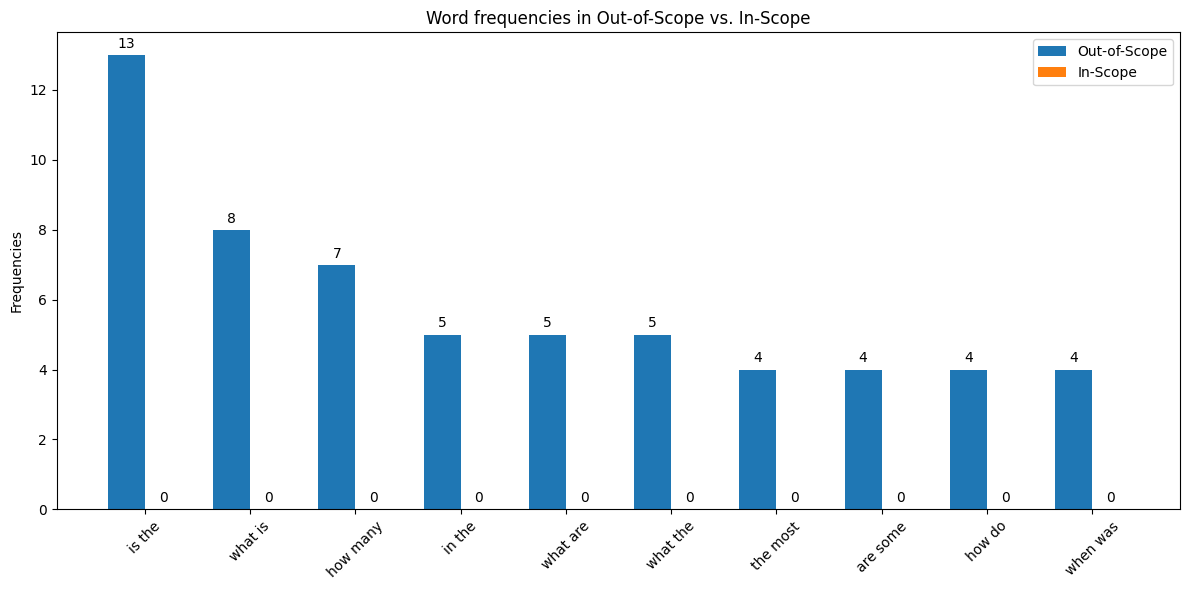

In [19]:
# Get the top 10 words from out-of-scope training data
oos_top_words = get_top_n_bigrams(oos_train_df['text'], 10)
oos_words = [word[0] for word in oos_top_words]  # Extract just the words

# Initialize CountVectorizer with the vocabulary set to the top out-of-scope words
vec_in_scope = CountVectorizer(vocabulary=oos_words)
bag_of_words_in_scope = vec_in_scope.fit_transform(train_df['text'])
sum_words_in_scope = bag_of_words_in_scope.sum(axis=0) 
in_scope_freq = [(word, sum_words_in_scope[0, idx]) for word, idx in vec_in_scope.vocabulary_.items()]

def plot_word_frequency_comparison(oos_freq, in_scope_freq):
    # Data preparation
    labels = [x[0] for x in oos_freq]
    oos_counts = [x[1] for x in oos_freq]
    in_scope_counts = [x[1] for x in in_scope_freq]

    x = list(range(len(labels)))  # Convert range to list
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar([xi - width/2 for xi in x], oos_counts, width, label='Out-of-Scope')
    rects2 = ax.bar([xi + width/2 for xi in x], in_scope_counts, width, label='In-Scope')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Frequencies')
    ax.set_title('Word frequencies in Out-of-Scope vs. In-Scope')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()

# Example call to the function (assuming oos_top_words and in_scope_freq are previously computed)
plot_word_frequency_comparison(oos_top_words, in_scope_freq)